<h2 style="text-align: center;">Statistics & Linear Model Lab3</h2>
<h3 style="text-align: center;">Wenjie Hu</h3>
<h3 style="text-align: center;">11/12/2023</h3>

---

![ex1](./imgs/ex1.jpg)

In [ ]:
install.packages(c("orthopolynom", "ks","SuppDists","tidyverse","tidyr"))
# install.packages("stats")
library(ggplot2)
library(tidyr)
library(SuppDists)
library(dgof)
library(orthopolynom)
library(polynom)
library(MASS)

In [2]:
pearson <- function(k , X) {
    hist_res <- hist_result <- hist(X, breaks = k, plot = FALSE)
    N <- hist_res$counts
    n = length(X)
    p = 1 / k
    return(sum(((N - n*p)**2)/(n*p)))
}

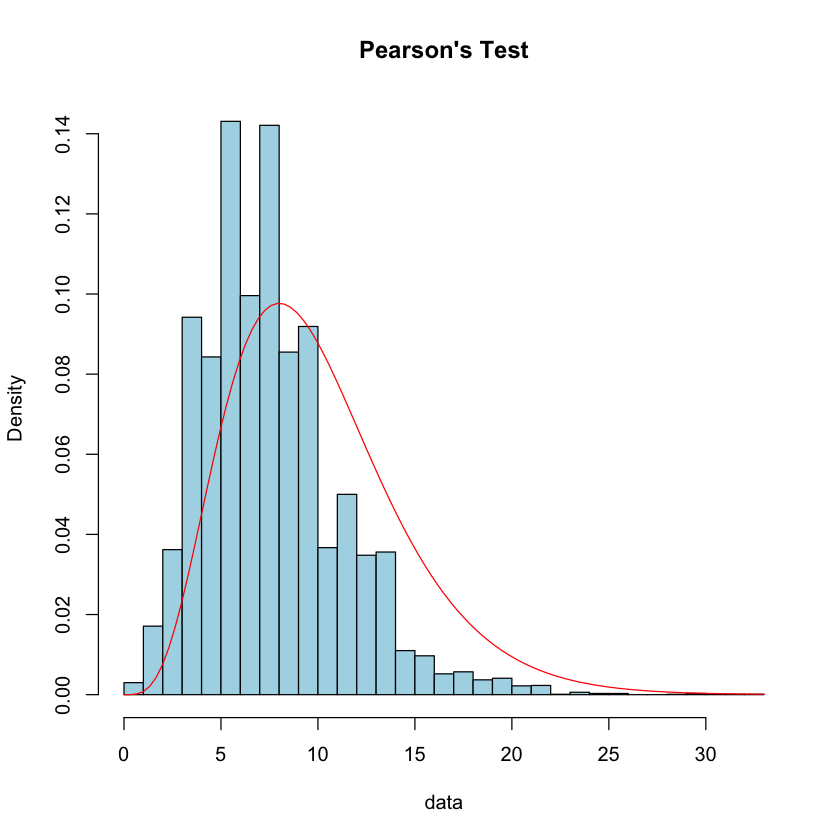

In [201]:
data <- numeric(10000)
k <- 10
n <- 10
for (i in 1:10000) {
  data[i] <- pearson(k = k, X = runif(n, 0, 1))
}

hist(data, breaks = 30, col = "lightblue",  prob = TRUE, border = "black", main = "Pearson's Test")
curve(dchisq(x, df = k), add = TRUE, col = "red")


In [3]:
neyman <- function(k, x) {
  ans <- 0
  n = length(x)
  bkx <- legendre.polynomials(n=k, normalized=TRUE)
  poly_val <- as.matrix(as.data.frame(polynomial.values(polynomials=bkx, x=scaleX(x, u=-1, v=1))))
  poly_val <- poly_val[, 2:ncol(poly_val)]
  poly_val <- t(poly_val)
  for (j in 1:k) {
    ans <- sum((1/sqrt(n)) * sum(poly_val[j, 1:n])^2)
  }
  return(ans)
}

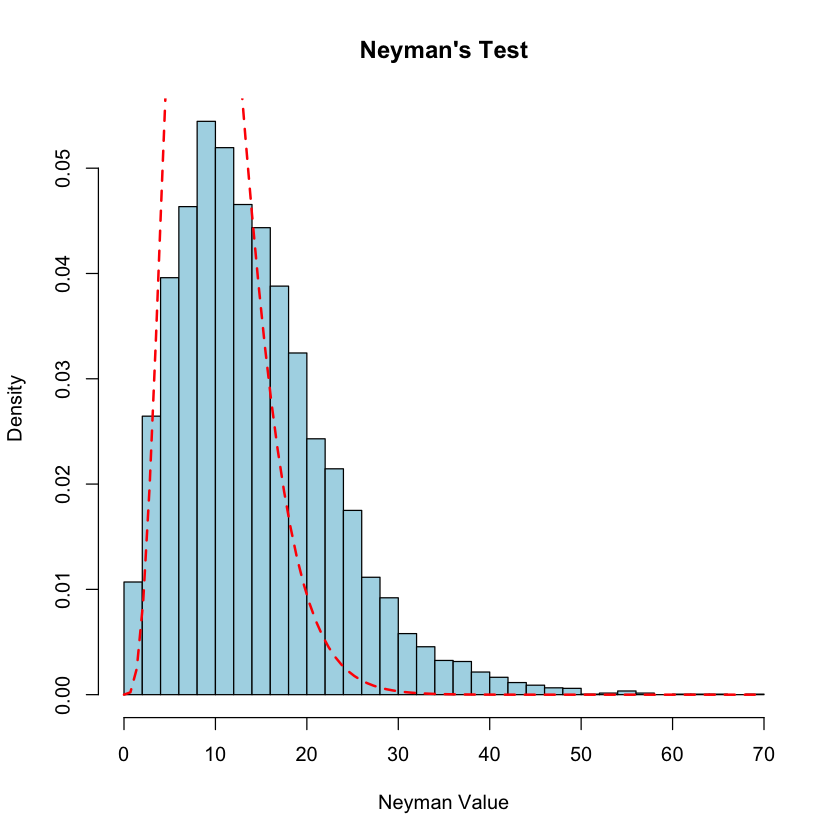

In [79]:
data <- numeric(10000)
k <- 10
n <- 10

for (i in 1:10000) {
  X <- runif(n, 0, 1)
  data[i] <- neyman(k, X)
}

hist(data, breaks = 30, prob = TRUE, col = "lightblue", border = "black", 
     main = "Neyman's Test", xlab = "Neyman Value", ylab = "Density")
curve(dchisq(x, df = k), add = TRUE, col = "red", lty = 2, lwd = 2)

In [4]:
ks <- function(X) {
  N <- length(X)
  statistic <- sqrt(N) * ks.test(X, "punif")$statistic
  return(statistic)
}

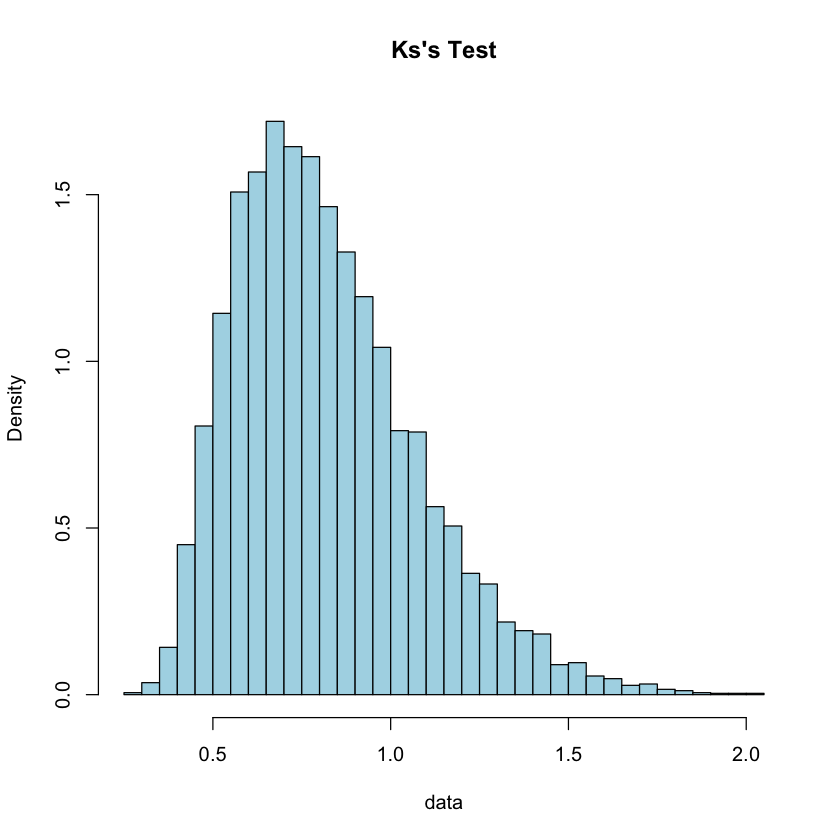

In [48]:
data <- numeric(10000)
k <- 10
for (i in 1:10000) {
  X = runif(n,0,1)
  data[i] <- ks(X)
}
hist(data, breaks = 50, prob = TRUE, col = "lightblue",
     border = "black", main = "Ks's Test")

In [49]:
n = 10
num_experiments = 10000
p4s <- c()
p8s <- c()
n1s <- c()
n4s <- c()
n8s <- c()
kses <- c()

In [50]:
for (i in 1:num_experiments){
    X = runif(n, 0, 1)
    p4 <- pearson(4, X)
    p8 <- pearson(8, X)
    n1 <- neyman(1, X)
    n4 <- neyman(4, X)
    n8 <- neyman(8, X)
    k <- ks(X)
    
    p4s[i] <- p4
    p8s[i] <- p8
    n1s[i] <- n1
    n4s[i] <- n4
    n8s[i] <- n8
    kses[i] <- k
}

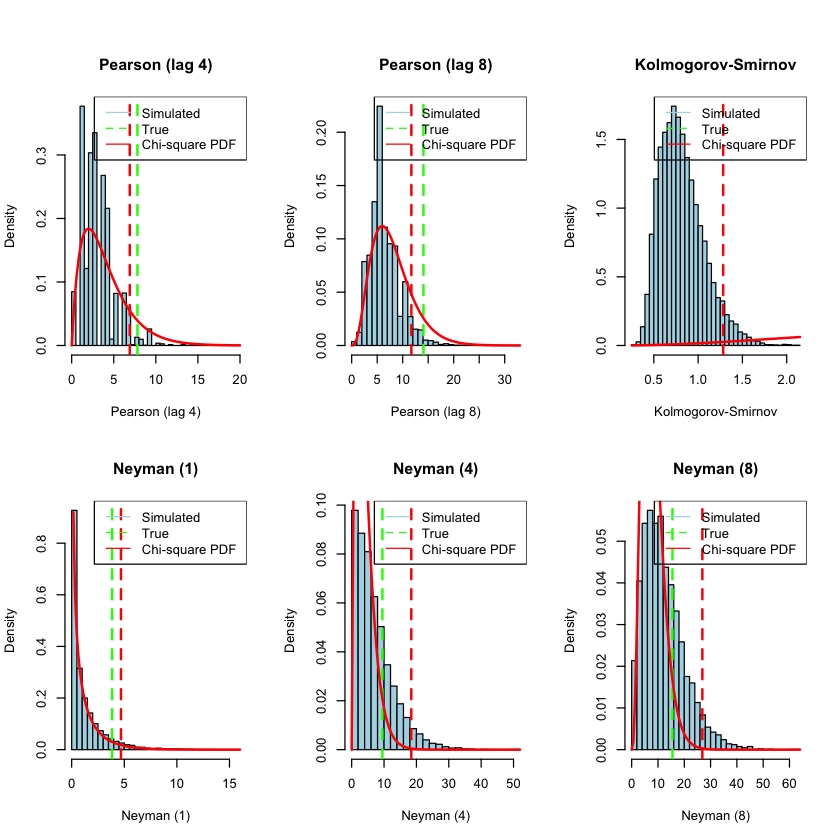

In [51]:
bins <- 30
par(mfrow = c(2, 3), mar = c(5, 4, 4, 2) + 0.1, oma = c(0, 0, 2, 0))

draw_critical_line <- function(data, title, critical_value, true_critical_value, df_true, bins) {
  hist(data, breaks = bins, prob = TRUE, col = "lightblue", border = "black",
       main = title, xlab = title, ylab = "Density")
  abline(v = critical_value[[1]], col = "red", lty = 2, lwd = 2)
  abline(v = true_critical_value, col = "green", lty = 2, lwd = 2)
  curve(dchisq(x, df = df_true), add = TRUE, col = "red", lty = 1, lwd = 2)
  legend("topright", legend = c("Simulated", "True", "Chi-square PDF"), 
         col = c("lightblue", "green", "red"), lty = c(1, 2, 1))
}

draw_critical_line(p4s, "Pearson (lag 4)", quantile(p4s, 0.95), qchisq(0.95, df = 3), 4, bins)
draw_critical_line(p8s, "Pearson (lag 8)", quantile(p8s, 0.95), qchisq(0.95, df = 7), 8, bins)
draw_critical_line(kses, "Kolmogorov-Smirnov", quantile(kses, 0.95), qchisq(0.95, df = 7), 7, bins)
draw_critical_line(n1s, "Neyman (1)", quantile(n1s, 0.95), qchisq(0.95, df = 1), 1, bins)
draw_critical_line(n4s, "Neyman (4)", quantile(n4s, 0.95), qchisq(0.95, df = 4), 4, bins)
draw_critical_line(n8s, "Neyman (8)", quantile(n8s, 0.95), qchisq(0.95, df = 8), 8, bins)

In [5]:
p4_true_cr <- qchisq(0.95, df = 3)
p8_true_cr <- qchisq(0.95, df = 7)
n1_true_cr <- qchisq(0.95, df = 1)
n4_true_cr <- qchisq(0.95, df = 4)
n8_true_cr <- qchisq(0.95, df = 8)

k_true_cr <- ks.test(runif(10,0,1),"punif")$statistic
# print(k_true_cr$statistic)
df_theoretical <- data.frame(
  "Statistic" = c("P_4", "P_8", "N_1", "N_4", "N_8", "KS"),
  "Theoretical_Critical_Val" = c(p4_true_cr, p8_true_cr, n1_true_cr, n4_true_cr, n8_true_cr,k_true_cr)
)
print(df_theoretical)


  Statistic Theoretical_Critical_Val
1       P_4                7.8147279
2       P_8               14.0671404
3       N_1                3.8414588
4       N_4                9.4877290
5       N_8               15.5073131
6        KS                0.1858376


for $n$ from 10,20,...,100

In [53]:
ns <- p4_crs <- p8_crs <- n1_crs <- n4_crs <- n8_crs <- k_crs <- numeric()

for (n in seq(10, 100, 10)) {
  p4s <- p8s <- n1s <- n4s <- n8s <- kes <- numeric()
  
  for (i in 1:10000) {
    X <- runif(n,0,1)
    p4 <- pearson(4, X)
    p8 <- pearson(8, X)
    n1 <- neyman(1, X)
    n4 <- neyman(4, X)
    n8 <- neyman(8, X)
    k <- ks(X)
    
    p4s[i] <- p4
    p8s[i] <- p8
    n1s[i] <- n1
    n4s[i] <- n4
    n8s[i] <- n8
    kes[i] <- k
  }
  
  p4_cr <- quantile(p4s, 0.95)
  p8_cr <- quantile(p8s, 0.95)
  n1_cr <- quantile(n1s, 0.95)
  n4_cr <- quantile(n4s, 0.95)
  n8_cr <- quantile(n8s, 0.95)
  k_cr <- quantile(kes, 0.95)
  
  ns <- c(ns, n)
  p4_crs <- c(p4_crs, p4_cr)
  p8_crs <- c(p8_crs, p8_cr)
  n1_crs <- c(n1_crs, n1_cr)
  n4_crs <- c(n4_crs, n4_cr)
  n8_crs <- c(n8_crs, n8_cr)
  k_crs <- c(k_crs, k_cr)
}


In [54]:
df_adjusted <- data.frame(
  "n" = ns,
  "P_4" = round(p4_crs - p4_true_cr, 3),
  "P_8" = round(p8_crs - p8_true_cr, 3),
  "N_1" = round(n1_crs - n1_true_cr, 3),
  "N_4" = round(n4_crs - n4_true_cr, 3),
  "N_8" = round(n8_crs - n8_true_cr, 3),
  "KS" = round(k_crs - k_true_cr, 3)
)

print(df_adjusted)


     n    P_4    P_8    N_1    N_4    N_8    KS
1   10 -0.915 -2.367  0.914  9.026 11.453 1.056
2   20 -0.015 -0.367  3.692  9.960 10.809 1.089
3   30  1.152  0.233  6.274 10.863 10.827 1.093
4   40  1.585  1.133  7.832 11.291 11.535 1.098
5   50  2.205  1.553  9.111 11.882 12.491 1.093
6   60  2.785  2.266 10.408 13.446 12.120 1.082
7   70  3.342  3.147 11.771 13.088 12.801 1.100
8   80  3.685  3.333 12.766 14.678 14.413 1.102
9   90  4.152  3.944 13.436 15.628 13.833 1.093
10 100  4.625  4.373 14.864 16.765 15.109 1.099


In [62]:
print(var(p4_crs - p4_true_cr))
print(var(p8_crs - p8_true_cr))
print(var(n1_crs - n1_true_cr))
print(var(n4_crs - n4_true_cr))
print(var(n8_crs - n8_true_cr))
print(var(k_crs - k_true_cr))

[1] 3.288024
[1] 4.507222
[1] 20.01697
[1] 6.304298
[1] 2.23895
[1] 0.0001774214


For the first task, our objective is to generate observations from the uniform distribution. Then, we compute the statistics and repeat the experiment 10000 times in order to determine the critical values for three different tests. These critical values are then compared with the 0.95 quantiles of their respective limiting distributions.  
To illustrate, we present histograms where $n=10$ above. Theoretical chi-square distributions are depicted by red lines, aligning well with the histograms of both the Pearson and Neyman statistics. The critical value calculated from the histogram is represented by a red dashed line, while the green line is the true critical value taken from the proper distributions. Despite the $n$ being  small, the critical values are close.  
Here is the table with the theoretical values.  
| $P_4$    |  $P_8$      | $N_1$    | $N_4$ | $N_8$ |$KS$|
|-------| ----------|---- |------------| -----------|--|
|7.8147279|14.0671404|3.8414588|9.4877290| 15.5073131|0.3507474|

Presented below is a table featuring the discrepancies between the estimated critical values and their corresponding theoretical values from the aforementioned table. Among the statistics examined, the KS statistic exhibits the highest stability and the smallest variance.

|$n$|$\hat{P}_4-P_4$|$\hat{P}_8-P_8$|$\hat{N}_1-N_1$|$\hat{N}_4-N_4$|$\hat{N}_8-N_8$|$\hat{KS}-KS$|
|:--:|:----:|:--------:|:----:|:------------:|:-----------:|:--:|
|10|-0.915|-2.367|0.914|9.026|11.453|1.056|
|20|-0.015|-0.367|3.692|9.960|10.809|1.089|
|30|1.152|0.233|6.274|10.863|10.827|1.093|
|40|1.585|1.133|7.832|11.291|11.535|1.098|
|50|2.205|1.553|9.111|11.882|12.491|1.093|
|60|2.785|2.266|10.408|13.446|12.120|1.082|
|70|3.342|3.147|11.771|13.088|12.801|1.100|
|80|3.685|3.333|12.766|14.678|14.413|1.102|
|90|4.152|3.944|13.436|15.628|13.833|1.093|
|100|4.625|4.373|14.864|16.765|15.109|1.099|
|var|3.288024|4.507222|20.01697|6.304298|2.23895|0.0001774214|








---

![ex2](./imgs/ex2.jpg)

The accept/reject von Neumann algorithm is a technique for generating random numbers that adhere to a specified probability distribution. The approach involves utilizing a uniformly distributed random number generator to produce a set of random numbers. Subsequently, these numbers are accepted or rejected based on their likelihood of occurrence within the desired distribution. This method leverages the principles introduced by von Neumann to efficiently generate random numbers that conform to a prescribed probability distribution.

The accept/reject von Neumann algorithm operates through the following steps:
1. Define the probability distribution from which random numbers are desired.
2. Identify the maximum value of the PDF for the chosen distribution; this acts as the scaling factor.
3. Utilize a uniformly distributed random number generator to produce a set of random numbers.
4. For each generated random number, calculate its probability of occurrence within the desired distribution using the PDF.
5. Accept the random number if its probability is greater than or equal to a uniformly distributed random number between 0 and the scaling factor; otherwise, reject it.
6. Repeat the above steps until a sufficient number of random numbers has been generated.
   
The accept/reject von Neumann algorithm serves as a straightforward and efficient method for generating random numbers that adhere to a specified probability distribution. It finds practical applications in simulations and other scenarios where the need arises to generate random numbers following a particular distribution.

in shortly, let $Y ~ f_y(y)$ and $V~f_v(v)$ where $f_Y$ and $f_v$ have common support with  
$M=sup_y {f_Y(y)\over f_v(V)} < \infty \implies {1\over M} {f_Y(y)\over f_v(y)}\leqslant 1$  
To generate a random variable $Y$~$f_Y:$  
a. Generate $U$~uniform $(0,1)$, $V$ ~$f_v$, independent.  
b. If $U\le{1\over M} {f_Y(V)\over f_v(V)}$, set $Y=V$; otherwise, return to step(a).



----

![ex3](./imgs/ex3.jpg)

In [22]:
get_density <- function(p, j) {
  f <- function(u) {
    return(1 + p * cos(j * pi * u))
  }
  return(f)
}

get_sample <- function(n, f, p = 0.4, j) {
  scaling_factor <- 1 + p
  sample <- numeric(0)
  
  while (length(sample) < n) {
    u <- runif(1, 0, 1)
    v <- runif(1, 0, scaling_factor)
    if (v < f(u)) {
      sample <- c(sample, u)
    }
  }
  return(sample)
}


In [23]:
print(df_theoretical)

  Statistic Theoretical_Critical_Val
1       P_4                7.8147279
2       P_8               14.0671404
3       N_1                3.8414588
4       N_4                9.4877290
5       N_8               15.5073131
6        KS                0.1858376


In [24]:
p <- 0.4
j <- 1
f <- get_density(p,j)

ns <- p4_crs <- p8_crs <- n1_crs <- n4_crs <- n8_crs <- k_crs <- numeric()
# ns <- p4_crs <- p8_crs <- n1_crs <- n4_crs <- n8_crs <- c()
for (n in seq(10, 100, by = 10)) {
  p4s <- p8s <- n1s <- n4s <- n8s <- c()
  # p4s <- p8s <- n1s <- n4s <- n8s <- kes <- numeric()
  for (i in seq(10000)) {
    X <- get_sample(n, f, p, j)
    p4 <- pearson(4, X)
    p8 <- pearson(8, X)
    n1 <- neyman(1, X)
    n4 <- neyman(4, X)
    n8 <- neyman(8, X)
    k <- ks(X)
    
    p4s <- c(p4s, p4)
    p8s <- c(p8s, p8)
    n1s <- c(n1s, n1)
    n4s <- c(n4s, n4)
    n8s <- c(n8s, n8)
    kes <- c(kes, k)
  }

  ns <- c(ns, n)
  p4_crs <- c(p4_crs, sum(p4s > p4_true_cr) / 10000)
  p8_crs <- c(p8_crs, sum(p8s > p8_true_cr) / 10000)
  n1_crs <- c(n1_crs, sum(n1s > n1_true_cr) / 10000)
  n4_crs <- c(n4_crs, sum(n4s > n4_true_cr) / 10000)
  n8_crs <- c(n8_crs, sum(n8s > n8_true_cr) / 10000)
  k_crs <- c(k_crs, sum(kes > k_true_cr) / 10000)
}


In [28]:
df_crs <- data.frame(
  "n" = ns,
  "P_4" = round(p4_crs, 3),
  "P_8" = round(p8_crs, 3),
  "N_1" = round(n1_crs , 3),
  "N_4" = round(n4_crs , 3),
  "N_8" = round(n8_crs , 3)
  # "KS" = round(k_crs , 3)
)

print(df_crs)


     n   P_4   P_8   N_1   N_4   N_8
1   10 0.044 0.032 0.146 0.259 0.281
2   20 0.125 0.068 0.399 0.221 0.198
3   30 0.266 0.144 0.591 0.210 0.177
4   40 0.388 0.220 0.713 0.211 0.169
5   50 0.513 0.311 0.801 0.218 0.166
6   60 0.638 0.416 0.862 0.213 0.174
7   70 0.758 0.517 0.911 0.218 0.168
8   80 0.836 0.617 0.938 0.232 0.174
9   90 0.902 0.704 0.959 0.230 0.178
10 100 0.949 0.786 0.972 0.240 0.175


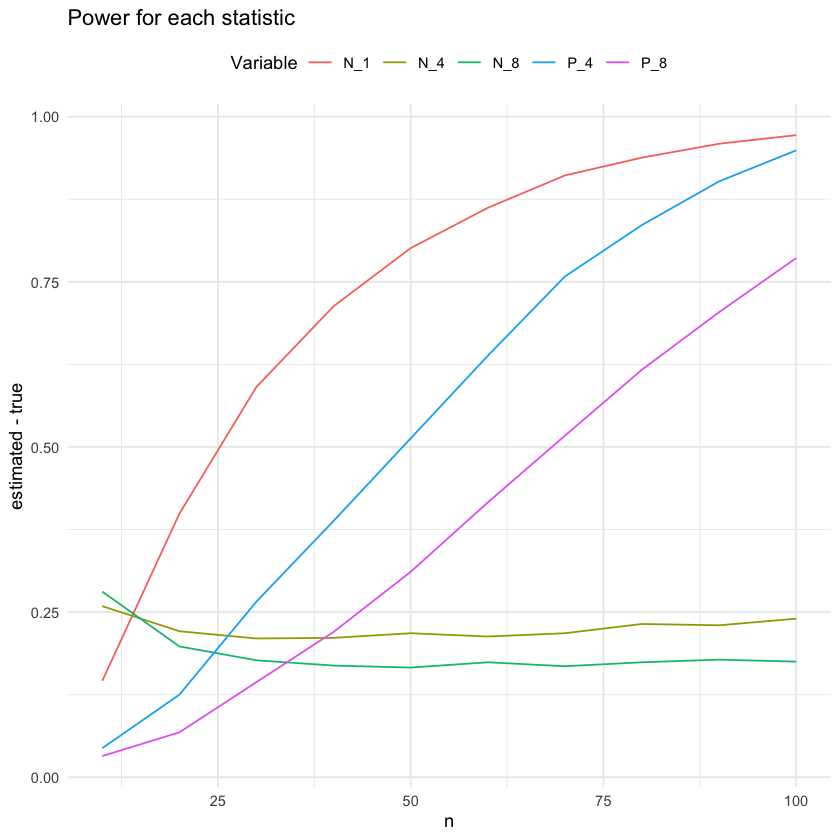

In [26]:
df_crs_ <- gather(df_crs, key = "Variable", value = "Value", -n)
plot_size <- c(8, 2)
p <- ggplot(df_crs_, aes(x = n, y = Value, color = Variable)) +
  geom_line() +
  labs(title = "Power for each statistic",
       x = "n",
       y = "estimated - true") +
  theme_minimal() +
  theme(legend.position = "top") 

print(p)

In the third task,  we don't work with standard density function, we use the von Neumann accept/reject algorithm to generate observations from the density $C_j(u,0.4)=1+0.4\cos(j\pi u),u\in(0,1)$. Then we calculate the values of the statistics $P_4,P_8,N_1,N_4,N_8,KS$. And we repeated the experiment for 10000 times for $n=10,20,...,100$ to find the values of powers functions of each test under consideration. We set the $\alpha=0.05$ as the same as the previous task.  
After 10000 times of experiment, we get the result of power functions. 
|$n$|$P_4$|$P_8$|$N_1$|$N_4$|$N_8$|$KS$|
|--|--|--|--|--|--|--|
|10|0.041|0.031|0.147|0.266|0.272|1.1|
|20|0.126|0.071|0.397|0.223|0.204|2.1|
|30|0.257|0.135|0.579|0.212|0.183|3.1|
|40|0.379|0.211|0.698|0.210|0.173|4.1|
|50|0.513|0.299|0.798|0.213|0.175|5.1|
|60|0.654|0.424|0.869|0.216|0.167|6.1|
|70|0.761|0.519|0.907|0.224|0.166|7.1|
|80|0.835|0.608|0.937|0.225|0.174|8.1|
|90|0.897|0.704|0.956|0.226|0.173|9.1|
|100|0.949|0.781|0.972|0.230|0.172|10.1|  

With more samples, the power of $P_4, P_8,N_1$ are increased as expected, $KS$ is linearly increased ,the distribution is less and less uniform, but for $N_4,N_8$ doesn‘t increase as the sample increases, there may made a mistake.

---

![ex4](./imgs/ex4.jpg)

In [8]:
params <- list(
  c(2, 0.5),
  c(3, 0.5),
  c(4, 0.6),
  c(5, 0.7),
  c(6, 0.7)
)

     n   P_4   P_8   N_1   N_4   N_8 KS
1   10 0.038 0.024 0.144 0.282 0.288  1
2   20 0.126 0.065 0.399 0.212 0.209  1
3   30 0.260 0.142 0.586 0.203 0.169  1
4   40 0.376 0.209 0.731 0.186 0.169  1
5   50 0.537 0.309 0.789 0.208 0.170  1
6   60 0.658 0.442 0.864 0.221 0.184  1
7   70 0.739 0.474 0.900 0.213 0.161  1
8   80 0.838 0.613 0.935 0.225 0.162  1
9   90 0.905 0.730 0.960 0.227 0.158  1
10 100 0.957 0.800 0.970 0.234 0.188  1
     n   P_4   P_8   N_1   N_4   N_8 KS
1   10 0.038 0.033 0.144 0.258 0.313  1
2   20 0.111 0.053 0.372 0.218 0.200  1
3   30 0.260 0.142 0.571 0.211 0.174  1
4   40 0.387 0.221 0.705 0.203 0.164  1
5   50 0.498 0.303 0.790 0.212 0.190  1
6   60 0.682 0.434 0.866 0.211 0.185  1
7   70 0.755 0.513 0.911 0.215 0.170  1
8   80 0.839 0.602 0.926 0.232 0.166  1
9   90 0.893 0.716 0.952 0.239 0.186  1
10 100 0.953 0.783 0.977 0.250 0.162  1


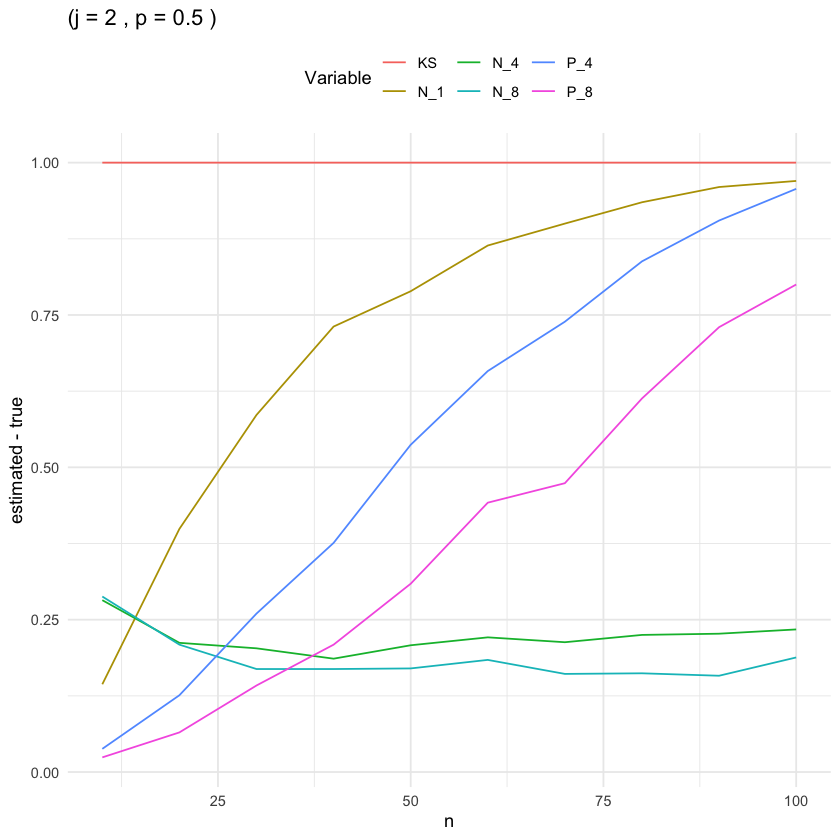

     n   P_4   P_8   N_1   N_4   N_8 KS
1   10 0.042 0.024 0.138 0.256 0.279  1
2   20 0.127 0.068 0.395 0.227 0.207  1
3   30 0.256 0.148 0.568 0.226 0.199  1
4   40 0.375 0.203 0.705 0.209 0.165  1
5   50 0.530 0.312 0.796 0.202 0.162  1
6   60 0.645 0.411 0.887 0.198 0.190  1
7   70 0.766 0.509 0.909 0.225 0.160  1
8   80 0.835 0.612 0.947 0.213 0.166  1
9   90 0.902 0.705 0.961 0.216 0.167  1
10 100 0.946 0.781 0.971 0.253 0.176  1


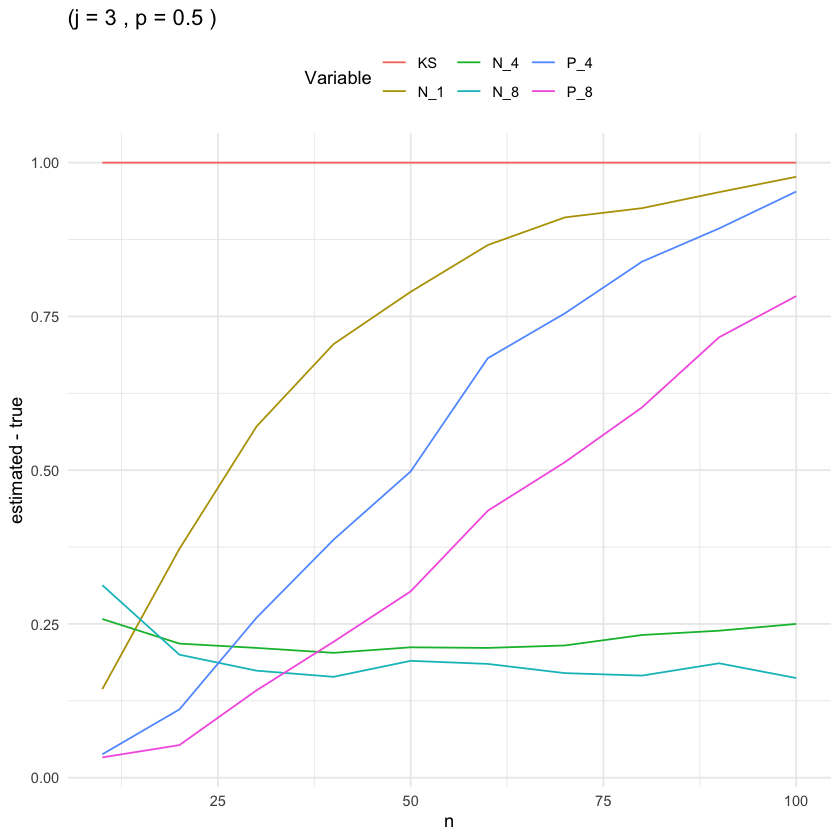

     n   P_4   P_8   N_1   N_4   N_8 KS
1   10 0.039 0.029 0.127 0.263 0.285  1
2   20 0.124 0.075 0.392 0.221 0.219  1
3   30 0.238 0.134 0.572 0.213 0.166  1
4   40 0.385 0.191 0.697 0.195 0.166  1
5   50 0.527 0.317 0.818 0.218 0.168  1
6   60 0.659 0.426 0.872 0.214 0.170  1
7   70 0.763 0.522 0.915 0.207 0.215  1
8   80 0.834 0.621 0.935 0.225 0.192  1
9   90 0.895 0.716 0.963 0.225 0.158  1
10 100 0.951 0.778 0.971 0.228 0.183  1


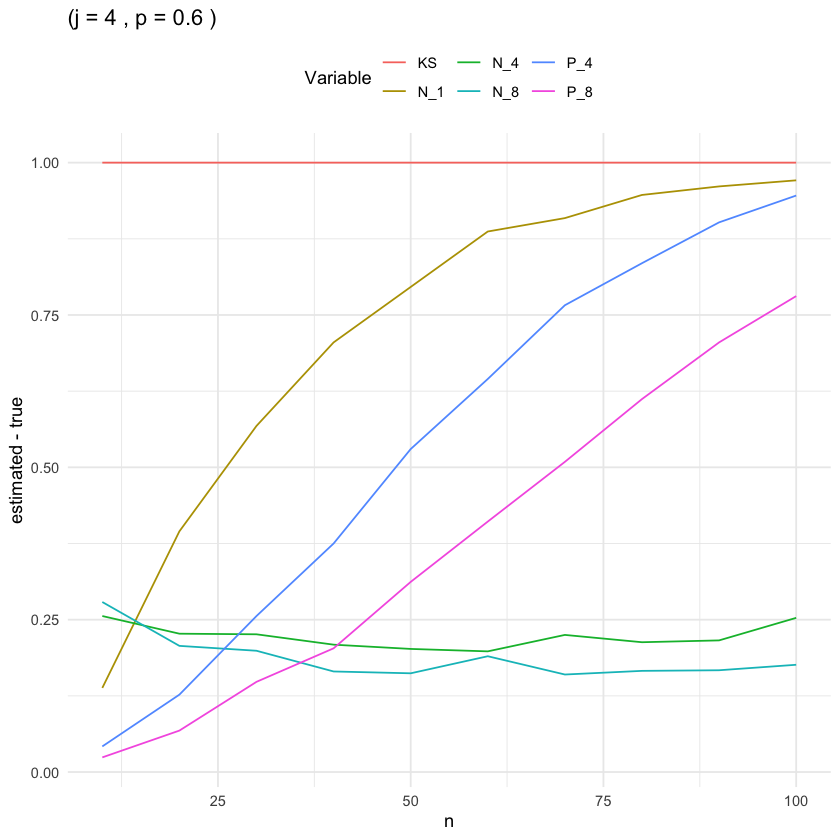

     n   P_4   P_8   N_1   N_4   N_8 KS
1   10 0.031 0.025 0.141 0.260 0.281  1
2   20 0.109 0.080 0.372 0.223 0.201  1
3   30 0.251 0.120 0.548 0.191 0.193  1
4   40 0.395 0.210 0.705 0.226 0.173  1
5   50 0.501 0.323 0.785 0.190 0.160  1
6   60 0.656 0.409 0.867 0.226 0.163  1
7   70 0.758 0.532 0.920 0.249 0.176  1
8   80 0.821 0.615 0.939 0.249 0.153  1
9   90 0.894 0.674 0.947 0.217 0.155  1
10 100 0.946 0.782 0.978 0.232 0.170  1


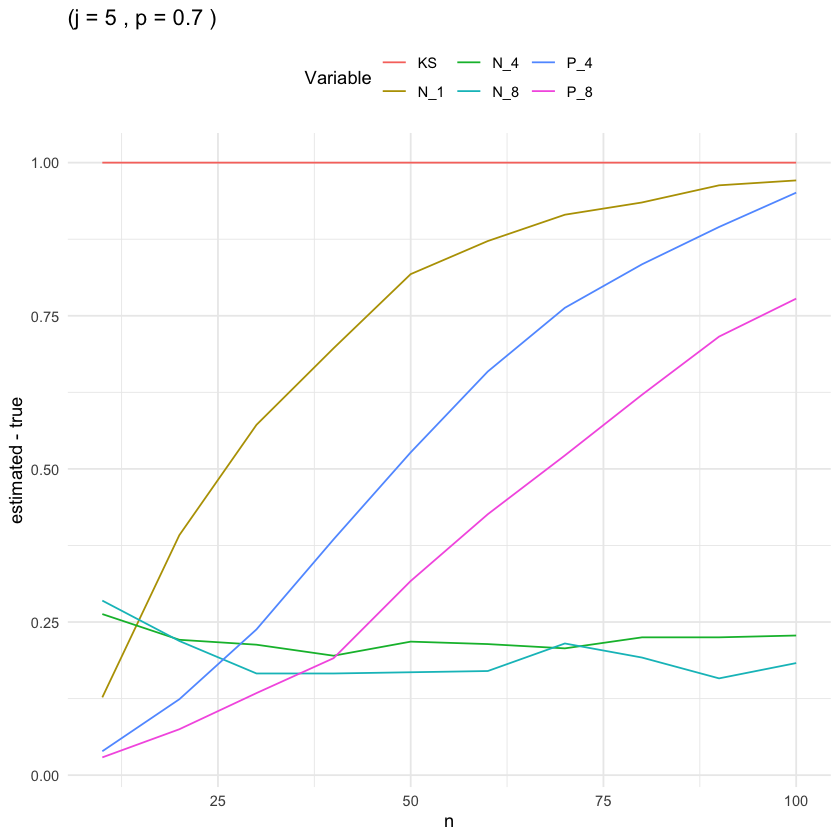

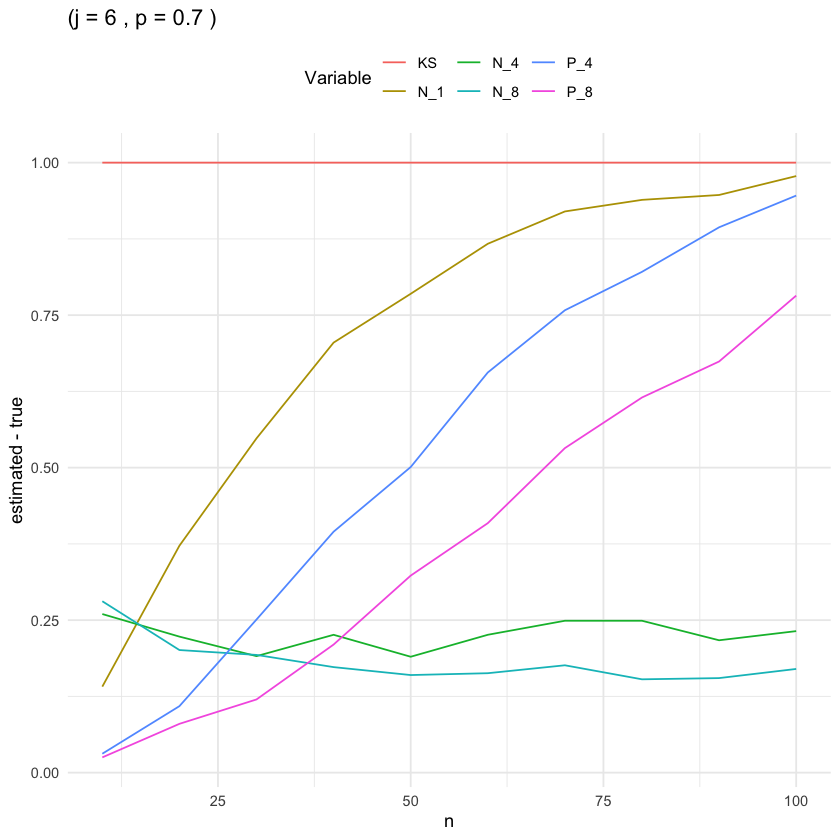

In [9]:
for (param in params) {
  j <- param[1]
  p <- param[2]
  ns <- p4_crs <- p8_crs <- n1_crs <- n4_crs <- n8_crs <- k_crs  <- c()
  # ns <- p4_crs <- p8_crs <- n1_crs <- n4_crs <- n8_crs <- c()
  for (n in seq(10, 100, by = 10)) {
    p4s <- p8s <- n1s <- n4s <- n8s <- kes <- c()
    # p4s <- p8s <- n1s <- n4s <- n8s <- c()
    n_iters <- 1000
    for (i in seq_len(n_iters)) {
      f <- get_density()
      X <- get_sample(n, f, p, j)
      p4 <- pearson(4, X)
      p8 <- pearson(8, X)
      n1 <- neyman(1, X)
      n4 <- neyman(4, X)
      n8 <- neyman(8, X)
      k <- ks(X)
      
      p4s <- c(p4s, p4)
      p8s <- c(p8s, p8)
      n1s <- c(n1s, n1)
      n4s <- c(n4s, n4)
      n8s <- c(n8s, n8)
      kes <- c(kes, k)
    }
    
    ns <- c(ns, n)
    p4_crs <- c(p4_crs, sum(p4s > p4_true_cr) / n_iters)
    p8_crs <- c(p8_crs, sum(p8s > p8_true_cr) / n_iters)
    n1_crs <- c(n1_crs, sum(n1s > n1_true_cr) / n_iters)
    n4_crs <- c(n4_crs, sum(n4s > n4_true_cr) / n_iters)
    n8_crs <- c(n8_crs, sum(n8s > n8_true_cr) / n_iters)
    k_crs <- c(k_crs, sum(kes > k_true_cr) / n_iters)
  }
  
  df_results <- data.frame(
    "n" = ns,
    "P_4" = round(p4_crs, 3),
    "P_8" = round(p8_crs, 3),
    "N_1" = round(n1_crs, 3),
    "N_4" = round(n4_crs, 3),
    "N_8" = round(n8_crs, 3),
    "KS" = round(k_crs, 3)
  )  
  
  print(df_results)

  
  df_results_ <- gather(df_results, key = "Variable", value = "Value",-n)
  plot_size <- c(8, 2)
  p <- ggplot(df_results_, aes(x = n, y = Value, color = Variable)) +
  geom_line() +
  labs(title = paste("(j =", j, ", p =", p, ")"),
       x = "n",
       y = "estimated - true") +
  theme_minimal() +
  theme(legend.position = "top")

  print(p)
}

For the last task, we generated $n=10,20,...,100$ from the density $C_1(u,p)=1+p\cos(j\pi u),u\in(0,1)$ and then repeat the same experiments from the previous task. Surprisingly, for different $u$ and $p$, their powers are almost always the same, just with only a slight difference. For some reason, the results of our KS tests are always 1. However, we compared the different sample size of observations generated by density under different parameters.